In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'./mouse_viral_study.csv')
df.head()

,Med_1_mL,Med_2_mL,Virus Present
0,6.508231,8.582531,0
1,4.126116,3.073459,1
2,6.427870,6.369758,0
3,3.672953,4.905215,1
4,1.580321,2.440562,1


<Axes: xlabel='Med_1_mL', ylabel='Med_2_mL'>

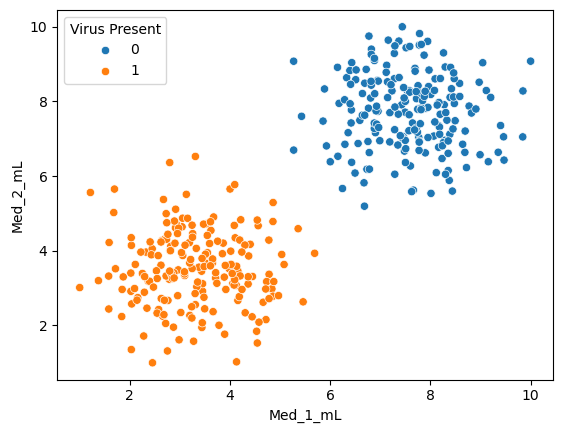

In [2]:
sns.scatterplot(x='Med_1_mL',y='Med_2_mL',hue='Virus Present',data=df)

In [3]:
from sklearn.svm import SVC

In [4]:
# help(SVC)

X = df.drop('Virus Present', axis=1)
y = df['Virus Present']

model = SVC(kernel='linear',C=1000)

In [5]:
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [6]:
from svm_margin_plot import plot_svm_boundary

In [7]:
if hasattr(X, "columns"):
    columns=X.columns
    print(columns)

Index(['Med_1_mL', 'Med_2_mL'], dtype='object')


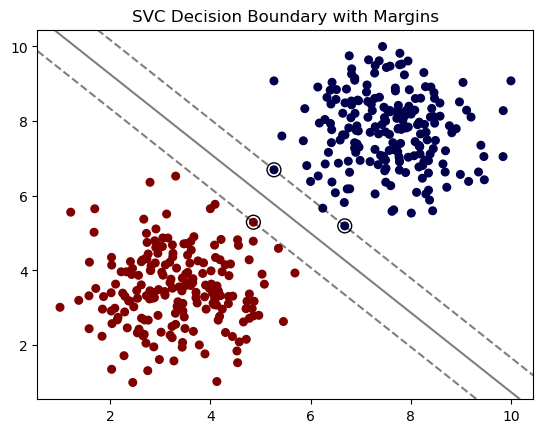

In [8]:
plot_svm_boundary(model, X, y)

In [46]:
# Lower the value of C, more the points are allowed with margin and more soft margin it become
model = SVC(kernel='linear',C=0.05)
model.fit(X,y)

SVC(C=0.05, kernel='linear')

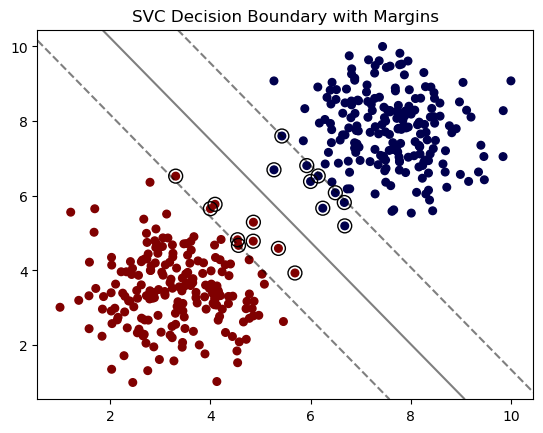

In [10]:
plot_svm_boundary(model, X, y)

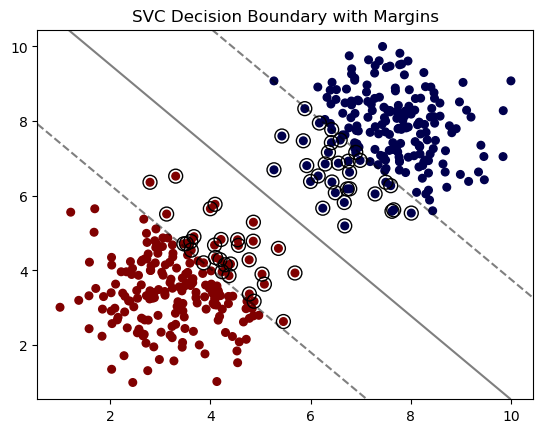

In [11]:
model = SVC(kernel='linear',C=0.005)
model.fit(X,y)
plot_svm_boundary(model, X, y)

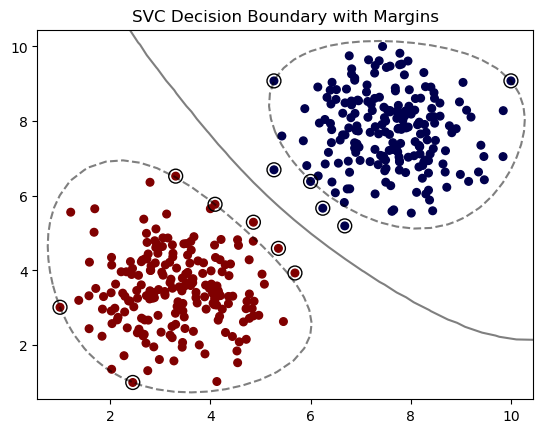

In [12]:
model = SVC(kernel='rbf',C=1)
model.fit(X, y)
plot_svm_boundary(model, X, y)

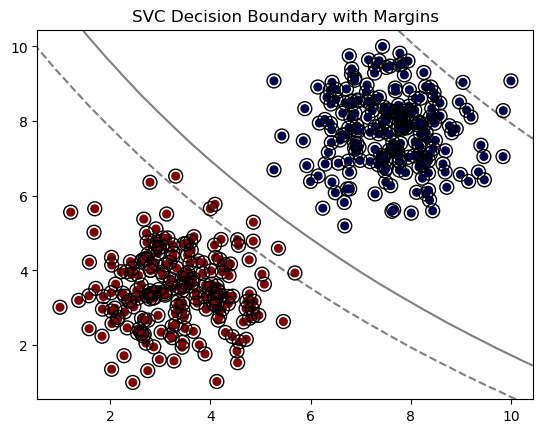

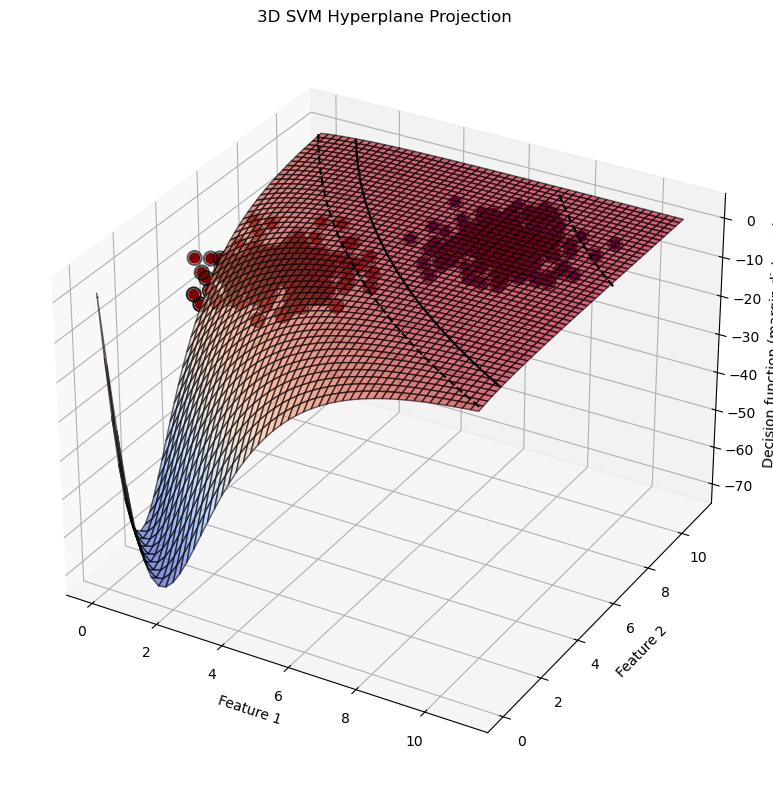

In [42]:
model = SVC(kernel='sigmoid')
model.fit(X,y)
plot_svm_boundary(model, X, y)
plot_svm_boundary_3d(model, X, y)

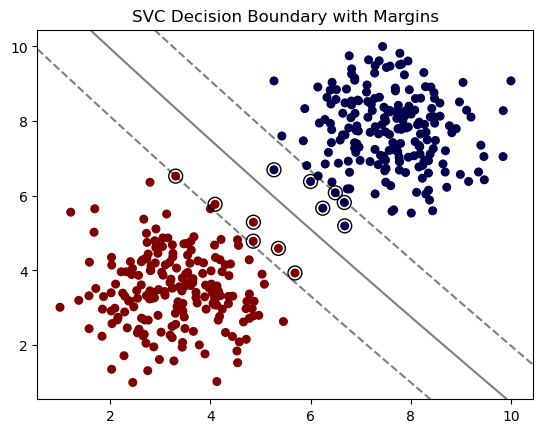

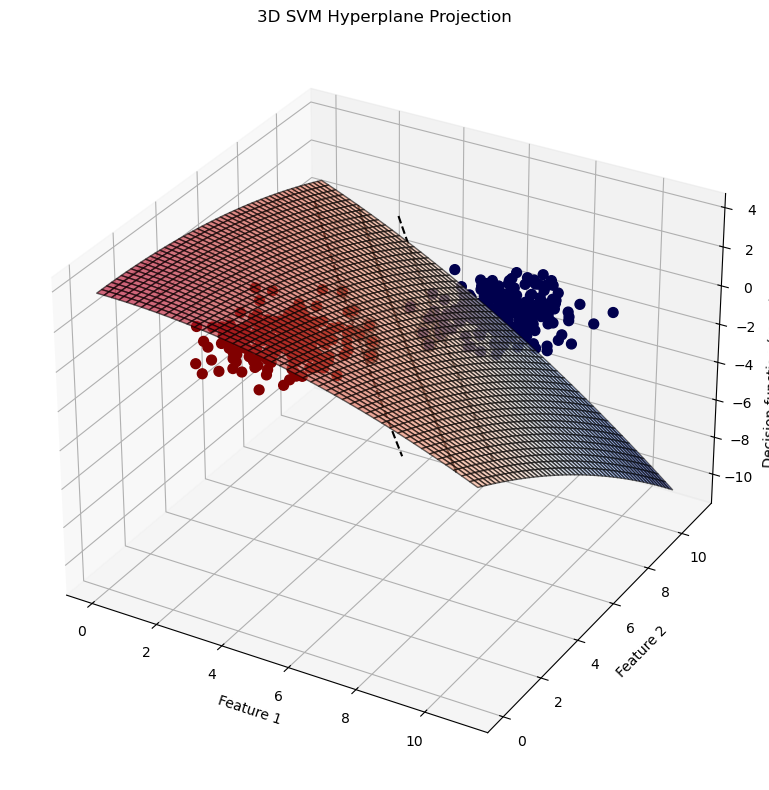

In [68]:
model = SVC(kernel='poly',C=0.05, degree=2)
model.fit(X,y)
plot_svm_boundary(model, X, y)
plot_svm_boundary_3d(model, X, y)

In [72]:
from sklearn.model_selection import GridSearchCV

svm = SVC()

param_grid = {'C':[0.01, 0.1, 1], 'kernel':['linear','rbf']}

In [74]:
grid = GridSearchCV(svm, param_grid)
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [76]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}